In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka/grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka0006.nc')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_final = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')
H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
age_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc")

H_data = H_data_40["H"].data
H_uncert_data = H_data_40["H_uncert"].data
age_c_data = age_data_40["age_c"].data
age_c_uncert_data = age_data_40["age_c_uncert"].data

mask_H = H_data >= 0.0
mask_H = mask_H.astype(float)
mask_age_c = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 60000 and H_data[j, i] >= 2000.0:
                mask_age_c[kc, j, i] = 1.0

In [3]:
sicopolis_dir = '/home/shreyas/update_to_develop_sicopolis/sicopolis_tuneAll'
simulation = 'grl40_bm5_paleo17a_CT4_BH0_AC_BM5_m11ka_pkp'
dict_sico_out_folder_prefixes = {"nodiff": "N",
                                 "tlm": "FORWARD",
                                 "adj": "ADJOINT",
                                 "tlm_action": "FORWARDHESSACTION",
                                 "adj_action": "ADJHESSACTION"}
dict_ad_exec_cmds_suffixes = {"nodiff": "nodiff",
                              "tlm": "forward",
                              "adj": "adjoint",
                              "tlm_action": "forwardhessaction",
                              "adj_action": "adjointhessaction"}
dict_ad_log_file_suffixes = {"nodiff": "nodiff",
                             "tlm": "tlm",
                             "adj": "adj",
                             "tlm_action": "tlm_hessaction",
                             "adj_action": "adj_hessaction"}
dict_ad_nc_suffixes = {"nodiff": "nodiff",
                       "tlm": "tlm",
                       "adj": "adj",
                       "tlm_action": "tlm_hessaction",
                       "adj_action": "adj_hessaction"}

KCMAX = 80
exp_sigma_level = dataCleaner.exp_sigma_level(zeta = np.arange(0,1+1./KCMAX,1./KCMAX),
                                              exponent = 2.0)
xModel40       = np.arange(-72.,97.,4.0)*10
yModel40       = np.arange(-345.,-56.,4.0)*10
time_ad = np.arange(12, dtype=float)
IMAX = xModel40.shape[0]-1
JMAX = yModel40.shape[0]-1

data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['q_geo'].data
log_q_geo = np.where(data > 0, np.log10(data), -100)
data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['H'].data
log_H = np.where(data > 0, np.log10(data), -100)

log_c_slide_init = np.log10(13.5)*np.ones((JMAX+1, IMAX+1))
log_gamma_s = np.log10(0.070458)*np.ones((JMAX+1, IMAX+1))
log_s_stat = np.log10(5.0)
log_beta1 = np.log10(2.73)
log_beta2 = np.log10(7.28)
log_Pmax = np.log10(0.6)
log_mu = np.log10(9.7155)
log_c_dis_da = np.log10(15659.0)

temp_c = np.zeros((KCMAX+1, JMAX+1, IMAX+1), dtype=float)
data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['age_c'].data
log_age_c = np.where(data > 0, np.log10(data), -100)

dict_og_state_fields_vals = {"xx_c_slide_init": log_c_slide_init,
                    "xx_q_geo": log_q_geo,
                    "xx_H": log_H,
                    "xx_gamma_s": log_gamma_s,
                    "xx_s_stat": log_s_stat,
                    "xx_beta1": log_beta1,
                    "xx_beta2": log_beta2,
                    "xx_Pmax": log_Pmax,
                    "xx_mu": log_mu,
                    "xx_c_dis_da": log_c_dis_da,
                    "xx_temp_c": temp_c,
                    "xx_age_c": log_age_c}

dict_state_fields_num_dims = {"xx_c_slide_init": "2D",
                        "xx_q_geo": "2D",
                        "xx_H": "2D",
                        "xx_gamma_s": "2D",
                        "xx_s_stat": "2D",
                        "xx_beta1": "2D",
                        "xx_beta2": "2D",
                        "xx_Pmax": "2D",
                        "xx_mu": "2D",
                        "xx_c_dis_da": "2D",
                        "xx_temp_c": "3D",
                        "xx_age_c": "3D"}

dict_state_coords = {"time_ad": time_ad,
               "zeta_c": exp_sigma_level,
               "y": yModel40,
               "x": xModel40}

dict_state_attrs_type = {"xx_c_slide_init": "nodiff",
                   "xx_q_geo": "nodiff",
                   "xx_H": "nodiff",
                   "xx_gamma_s": "nodiff",
                   "xx_s_stat": "nodiff",
                   "xx_beta1": "nodiff",
                   "xx_beta2": "nodiff",
                   "xx_Pmax": "nodiff",
                   "xx_mu": "nodiff",
                   "xx_c_dis_da": "nodiff",
                   "xx_temp_c": "nodiff",
                   "xx_age_c": "nodiff"}

dict_state_fields_or_scalars = {"xx_c_slide_init": "field",
                          "xx_q_geo": "field",
                          "xx_H": "field",
                          "xx_gamma_s": "field",
                          "xx_s_stat": "scalar",
                          "xx_beta1": "scalar",
                          "xx_beta2": "scalar",
                          "xx_Pmax": "scalar",
                          "xx_mu": "scalar",
                          "xx_c_dis_da": "scalar",
                          "xx_temp_c": "field",
                          "xx_age_c": "field"}

dict_masks_observables = {"H": mask_H*H_uncert_data**(-2), "age_c": mask_age_c*age_c_uncert_data**(-2)}

dict_prior_alphas = {"xx_c_slide_init": 0.001,
                          "xx_q_geo": 0.001,
                          "xx_H": 0.001,
                          "xx_gamma_s": 0.001,
                          "xx_s_stat": 0.001,
                          "xx_beta1": 0.001,
                          "xx_beta2": 0.001,
                          "xx_Pmax": 0.001,
                          "xx_mu": 0.001,
                          "xx_c_dis_da": 0.001,
                          "xx_temp_c": 0.001,
                          "xx_age_c": 0.001}

dict_prior_sigmas = {"xx_c_slide_init": None,
                          "xx_q_geo": None,
                          "xx_H": None,
                          "xx_gamma_s": None,
                          "xx_s_stat": 1.0,
                          "xx_beta1": 1.0,
                          "xx_beta2": 1.0,
                          "xx_Pmax": 1.0,
                          "xx_mu": 1.0,
                          "xx_c_dis_da": 1.0,
                          "xx_temp_c": np.ones((KCMAX+1, JMAX+1, IMAX+1), dtype=float),
                          "xx_age_c": np.ones((KCMAX+1, JMAX+1, IMAX+1), dtype=float)}

dict_prior_gammas = {"xx_c_slide_init": 10.0,
                          "xx_q_geo": 10.0,
                          "xx_H": 10.0,
                          "xx_gamma_s": 10.0,
                          "xx_s_stat": None,
                          "xx_beta1": None,
                          "xx_beta2": None,
                          "xx_Pmax": None,
                          "xx_mu": None,
                          "xx_c_dis_da": None,
                          "xx_temp_c": None,
                          "xx_age_c": None}

dict_prior_deltas = {"xx_c_slide_init": 0.1,
                          "xx_q_geo": 0.1,
                          "xx_H": 0.1,
                          "xx_gamma_s": 0.1,
                          "xx_s_stat": None,
                          "xx_beta1": None,
                          "xx_beta2": None,
                          "xx_Pmax": None,
                          "xx_mu": None,
                          "xx_c_dis_da": None,
                          "xx_temp_c": None,
                          "xx_age_c": None}

list_fields_to_ignore = ["xx_H", "xx_mu", "xx_temp_c"]
# all_fields = ["xx_c_slide_init", "xx_q_geo", "xx_H", "xx_gamma_s", 
#               "xx_s_stat", "xx_beta1", "xx_beta2", "xx_Pmax", "xx_mu", "xx_c_dis_da", 
#               "xx_temp_c", "xx_age_c"]

/tmp/ipykernel_3467844/3187530304.py:36: RuntimeWarning: divide by zero encountered in log10
  log_H = np.where(data > 0, np.log10(data), -100)
/tmp/ipykernel_3467844/3187530304.py:49: RuntimeWarning: divide by zero encountered in log10
  log_age_c = np.where(data > 0, np.log10(data), -100)


In [4]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars, dict_masks_observables,
                                dict_prior_alphas, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

ds_inp_nodiff = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "nodiff")
ds_inp_adj = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "adj")

DA.l_bfgs(2, 3, init_alpha = 1.e-6)

-------------------------------------
Initial fc = 5029887.7879417185
-------------------------------------
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Minimum tolerable step size alpha reached.
Step size alpha = 6.103515625e-11
-------------------------------------
Iter 1, fc = 2218908.823067813
--------------------------------

/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/optim/optim_new.py:387: RuntimeWarning: invalid value encountered in scalar divide
  ratio = (fc_new - fc)/(alpha*pTg)


Minimum tolerable step size alpha reached.
Step size alpha = 6.103515625e-11
-------------------------------------
Iter 2, fc = 2218908.823067813
-------------------------------------


<xarray.Dataset> Size: 4MB
Dimensions:          (y: 73, x: 43, scalar: 1, zeta_c: 81)
Coordinates:
  * x                (x) float64 344B -7.2e+05 -6.8e+05 ... 9.2e+05 9.6e+05
  * y                (y) float64 584B -3.45e+06 -3.41e+06 ... -6.1e+05 -5.7e+05
Dimensions without coordinates: scalar, zeta_c
Data variables:
    xx_c_slide_init  (y, x) float64 25kB ...
    xx_q_geo         (y, x) float64 25kB ...
    xx_H             (y, x) float64 25kB ...
    xx_gamma_s       (y, x) float64 25kB ...
    xx_s_stat        (scalar) float64 8B 200.4
    xx_beta1         (scalar) float64 8B 52.92
    xx_beta2         (scalar) float64 8B 53.1
    xx_Pmax          (scalar) float64 8B -71.37
    xx_mu            (scalar) float64 8B 0.9875
    xx_c_dis_da      (scalar) float64 8B 298.6
    xx_temp_c        (zeta_c, y, x) float64 2MB ...
    xx_age_c         (zeta_c, y, x) float64 2MB ...
Attributes:
    history:  2025-02-04 17:29:15 -06:00 - Data produced

In [5]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars, dict_masks_observables,
                                dict_prior_alphas, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

ds_inp_nodiff = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "nodiff")
ds_inp_adj = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "adj")

fc = DA.eval_cost()

sigma_B_squared, sigma_P_squared, delta_sigma_qoi_squared = DA.forward_uq_propagation(5, 5)

sigma_B_squared, sigma_P_squared, delta_sigma_qoi_squared

(3.6795214484171384e+25, 3.6795214484164607e+25, 1.8418599978531347e-13)

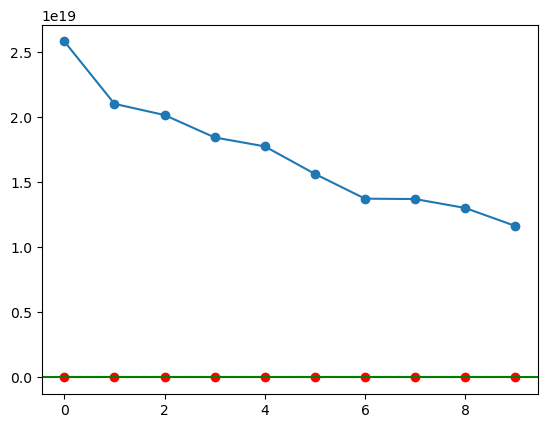

In [6]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars, dict_masks_observables,
                                dict_prior_alphas, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

ds_inp_nodiff = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "nodiff")
ds_inp_adj = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "adj")

fc = DA.eval_cost()

U_misfit, Lambda_misfit = DA.revd(5, 5, mode = "misfit_prior_precond")
U_full, Lambda_full = DA.revd(5, 5, mode = "full_prior_precond")

plt.scatter(np.arange(Lambda_misfit.shape[0]), np.sort(Lambda_misfit)[::-1])
plt.plot(np.sort(Lambda_misfit)[::-1])

plt.scatter(np.arange(Lambda_full.shape[0]), np.sort(Lambda_full)[::-1], color = "red")
plt.plot(np.sort(Lambda_full)[::-1], "r--")

plt.axhline(1, color = "green")

In [7]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars, dict_masks_observables,
                                dict_prior_alphas, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

ds_inp_nodiff = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "nodiff")
ds_inp_adj = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "adj")

fc = DA.eval_cost()

ds_x = DA.create_ad_tlm_action_input_nc(bool_randomize = True)
ds_x_tlm_only = DA.subset_of_ds(ds_x, "type", "tlm")
    
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

DA.l2_inner_product([ds_x_tlm_only, ds_H_misfit_x], ["tlm", "adj"]), DA.l2_inner_product([ds_Ax, ds_noise_cov_inv_Ax], ["tlmhessaction", "adjhessaction"])

(6.50390736539684e+22, 6.50390736539684e+22)

In [8]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars, dict_masks_observables,
                                dict_prior_alphas, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

ds_inp_nodiff = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "nodiff")
ds_inp_adj = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "adj")

fc = DA.eval_cost()

dict_tlm_action_only_fields_vals = {}
for var in ds_x_tlm_only:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
    
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

DA.l2_inner_product([ds_x_tlm_only, ds_H_misfit_x], ["tlm", "adj"]), DA.l2_inner_product([ds_Ax, ds_noise_cov_inv_Ax], ["tlmhessaction", "adjhessaction"])

(6.50390736539684e+22, 6.50390736539684e+22)

In [9]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars, dict_masks_observables,
                                dict_prior_alphas, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

ds_inp_nodiff = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "nodiff")
ds_inp_adj = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "adj")

fc = DA.eval_cost()

dict_tlm_action_only_fields_vals = {}
for var in ds_x_tlm_only:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
    
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

ds_Cx = DA.eval_sqrt_prior_cov_action(ad_key_adj_or_adj_action_or_tlm_action = "tlm_action")
ds_A_Cx = DA.eval_tlm_action()
ds_noise_cov_inv_A_Cx = DA.eval_noise_cov_inv_action(ds_A_Cx)

dict_tlm_action_only_fields_vals = {}
for var in ds_x_tlm_only:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)

ds_C_H_misfit_Cx = DA.eval_prior_preconditioned_misfit_hessian_action()

DA.l2_inner_product([ds_x_tlm_only, ds_C_H_misfit_Cx], ["tlm", "adj"]), DA.l2_inner_product([ds_A_Cx, ds_noise_cov_inv_A_Cx], ["tlmhessaction", "adjhessaction"])

(6.503947219915469e+22, 6.503947219915468e+22)

In [10]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x_tlm_only:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
ds_Cx = DA.eval_sqrt_prior_cov_action(ad_key_adj_or_adj_action_or_tlm_action = "tlm_action")
ds_C_inv_Cx = DA.eval_sqrt_prior_cov_inv_action()

DA.l2_inner_product([ds_C_inv_Cx, ds_C_inv_Cx], ["tlm", "tlm"]), DA.l2_inner_product([ds_x_tlm_only, ds_x_tlm_only], ["tlm", "tlm"])

(264469.56876773486, 264469.56876773486)

In [11]:
DA.l2_inner_product([ds_Cx, ds_Cx], ["tlm", "tlm"]), DA.l2_inner_product([ds_x_tlm_only, ds_x_tlm_only], ["tlm", "tlm"])

(255267.38943616647, 264469.56876773486)

In [12]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars, dict_masks_observables,
                                dict_prior_alphas, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

ds_inp_nodiff = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "nodiff")
ds_inp_adj = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "adj")

DA.gradient_descent(2, init_alpha = 1.e-6)

-------------------------------------
iter 0, fc = 5029887.7879417185
-------------------------------------
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Minimum tolerable step size alpha reached.
Step size alpha = 6.103515625e-11
-------------------------------------
iter 1, fc = 2218908.823067813
--------------------------------

/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/optim/optim_new.py:387: RuntimeWarning: invalid value encountered in scalar divide
  ratio = (fc_new - fc)/(alpha*pTg)


Minimum tolerable step size alpha reached.
Step size alpha = 6.103515625e-11
-------------------------------------
iter 2, fc = 2218908.823067813
-------------------------------------


<xarray.Dataset> Size: 4MB
Dimensions:          (y: 73, x: 43, scalar: 1, zeta_c: 81)
Coordinates:
  * x                (x) float64 344B -7.2e+05 -6.8e+05 ... 9.2e+05 9.6e+05
  * y                (y) float64 584B -3.45e+06 -3.41e+06 ... -6.1e+05 -5.7e+05
Dimensions without coordinates: scalar, zeta_c
Data variables:
    xx_c_slide_init  (y, x) float64 25kB 1.13 1.13 1.13 1.13 ... 1.13 1.13 1.13
    xx_q_geo         (y, x) float64 25kB -1.286 -1.28 -1.275 ... -1.145 -1.146
    xx_H             (y, x) float64 25kB ...
    xx_gamma_s       (y, x) float64 25kB -1.152 -1.152 -1.152 ... -1.152 -1.152
    xx_s_stat        (scalar) float64 8B 200.4
    xx_beta1         (scalar) float64 8B 52.92
    xx_beta2         (scalar) float64 8B 53.1
    xx_Pmax          (scalar) float64 8B -71.37
    xx_mu            (scalar) float64 8B 0.9875
    xx_c_dis_da      (scalar) float64 8B 298.6
    xx_temp_c        (zeta_c, y, x) float64 2MB ...
    xx_age_c         (zeta_c, y, x) float64 2MB -100.0 -100.0 ... -100.0 -100.0
Attributes:
    history:  2025-02-04 17:38:56 -06:00 - Data produced

In [14]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars, dict_masks_observables,
                                dict_prior_alphas, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

ds_inp_nodiff = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "nodiff")
ds_inp_adj = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "adj")

DA.inexact_gn_hessian_cg(MAX_ITERS=1, init_alpha_gd = 1.e-6)

-------------------------------------
Initial fc = 5029887.7879417185
-------------------------------------
CG iter 1
CG iter 2
conjugate_gradient: Convergence.
Angle between p_hat and g_hat in degrees:  180.0
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Minimum tolerable step size alpha reached.
Step size alpha = 5.820766091346741e-11
Step size alpha 5.820766091346741e-11 is too small for any real improvement with Inexact GN-Hessian CG, switching to gradient descent for this step.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulatio

<xarray.Dataset> Size: 4MB
Dimensions:          (y: 73, x: 43, scalar: 1, zeta_c: 81)
Coordinates:
  * x                (x) float64 344B -7.2e+05 -6.8e+05 ... 9.2e+05 9.6e+05
  * y                (y) float64 584B -3.45e+06 -3.41e+06 ... -6.1e+05 -5.7e+05
Dimensions without coordinates: scalar, zeta_c
Data variables:
    xx_c_slide_init  (y, x) float64 25kB ...
    xx_q_geo         (y, x) float64 25kB ...
    xx_H             (y, x) float64 25kB ...
    xx_gamma_s       (y, x) float64 25kB ...
    xx_s_stat        (scalar) float64 8B 200.4
    xx_beta1         (scalar) float64 8B 52.92
    xx_beta2         (scalar) float64 8B 53.1
    xx_Pmax          (scalar) float64 8B -71.37
    xx_mu            (scalar) float64 8B 0.9875
    xx_c_dis_da      (scalar) float64 8B 298.6
    xx_temp_c        (zeta_c, y, x) float64 2MB ...
    xx_age_c         (zeta_c, y, x) float64 2MB ...
Attributes:
    history:  2025-02-04 17:43:53 -06:00 - Data produced

In [15]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars, dict_masks_observables,
                                dict_prior_alphas, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

ds_inp_nodiff = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "nodiff")
ds_inp_adj = DA.create_ad_nodiff_or_adj_input_nc(dict_og_state_fields_vals, dict_state_fields_num_dims, 
                                                    dict_state_coords, dict_state_attrs_type, dict_state_fields_or_scalars,
                                                    "adj")

DA.inexact_gn_hessian_cg(MAX_ITERS=1, init_alpha_gd = 1.e-6, cg_tolerance_type = "linear")

-------------------------------------
Initial fc = 5029887.7879417185
-------------------------------------
CG iter 1
CG iter 2
conjugate_gradient: Convergence.
Angle between p_hat and g_hat in degrees:  180.0
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Minimum tolerable step size alpha reached.
Step size alpha = 5.820766091346741e-11
Step size alpha 5.820766091346741e-11 is too small for any real improvement with Inexact GN-Hessian CG, switching to gradient descent for this step.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulatio

<xarray.Dataset> Size: 4MB
Dimensions:          (y: 73, x: 43, scalar: 1, zeta_c: 81)
Coordinates:
  * x                (x) float64 344B -7.2e+05 -6.8e+05 ... 9.2e+05 9.6e+05
  * y                (y) float64 584B -3.45e+06 -3.41e+06 ... -6.1e+05 -5.7e+05
Dimensions without coordinates: scalar, zeta_c
Data variables:
    xx_c_slide_init  (y, x) float64 25kB ...
    xx_q_geo         (y, x) float64 25kB ...
    xx_H             (y, x) float64 25kB ...
    xx_gamma_s       (y, x) float64 25kB ...
    xx_s_stat        (scalar) float64 8B 200.4
    xx_beta1         (scalar) float64 8B 52.92
    xx_beta2         (scalar) float64 8B 53.1
    xx_Pmax          (scalar) float64 8B -71.37
    xx_mu            (scalar) float64 8B 0.9875
    xx_c_dis_da      (scalar) float64 8B 298.6
    xx_temp_c        (zeta_c, y, x) float64 2MB ...
    xx_age_c         (zeta_c, y, x) float64 2MB ...
Attributes:
    history:  2025-02-04 17:44:54 -06:00 - Data produced